In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from mlxtend.feature_selection import SequentialFeatureSelector
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df1=pd.read_csv('gapminder.csv')

In [3]:
df1.head()

population  fertility  HIV        CO2  BMI_male    GDP  BMI_female  life  \
0    34811059       2.73  0.1   3.328945  24.59620  12314    129.9049  75.3   
1    19842251       6.43  2.0   1.474353  22.25083   7103    130.1247  58.3   
2    40381860       2.24  0.5   4.785170  27.50170  14646    118.8915  75.5   
3     2975029       1.40  0.1   1.804106  25.35542   7383    132.8108  72.5   
4    21370348       1.96  0.1  18.016313  27.56373  41312    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific

In [4]:
df1.shape

(139, 10)

In [5]:
df1.describe()

population   fertility         HIV         CO2    BMI_male  \
count  1.390000e+02  139.000000  139.000000  139.000000  139.000000   
mean   3.549977e+07    3.005108    1.915612    4.459874   24.623054   
std    1.095121e+08    1.615354    4.408974    6.268349    2.209368   
min    2.773150e+05    1.280000    0.060000    0.008618   20.397420   
25%    3.752776e+06    1.810000    0.100000    0.496190   22.448135   
50%    9.705130e+06    2.410000    0.400000    2.223796   25.156990   
75%    2.791973e+07    4.095000    1.300000    6.589156   26.497575   
max    1.197070e+09    7.590000   25.900000   48.702062   28.456980   

                 GDP  BMI_female        life  child_mortality  
count     139.000000  139.000000  139.000000       139.000000  
mean    16638.784173  126.701914   69.602878        45.097122  
std     19207.299083    4.471997    9.122189        45.724667  
min       588.000000  117.375500   45.200000         2.700000  
25%      2899.000000  123.232200   62.200000         8.100000  
50%      9938.000000  126.519600   72.000000        24.000000  
75%     23278.500000  130.275900   76.850000        74.200000  
max    126076.000000  135.492000   82.600000       192.000000

In [6]:
df1.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [8]:
df1['population'].nunique()

139

In [9]:
df1=df1.drop('population',axis=1)

In [10]:
df1.head()

fertility  HIV        CO2  BMI_male    GDP  BMI_female  life  \
0       2.73  0.1   3.328945  24.59620  12314    129.9049  75.3   
1       6.43  2.0   1.474353  22.25083   7103    130.1247  58.3   
2       2.24  0.5   4.785170  27.50170  14646    118.8915  75.5   
3       1.40  0.1   1.804106  25.35542   7383    132.8108  72.5   
4       1.96  0.1  18.016313  27.56373  41312    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific

In [11]:
df1.nunique()

fertility          116
HIV                 45
CO2                139
BMI_male           139
GDP                139
BMI_female         139
life               109
child_mortality    131
Region               6
dtype: int64

In [12]:
for i in df1.iloc[:,0:-1]:
    print(df1[i].skew())

0.9673942369047374
3.9185261094083095
3.6285963285060667
-0.2551056643902182
2.3586616852353073
-0.08024995256794422
-0.5483816510869028
1.15639965861021


In [13]:
df1['Region'].value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

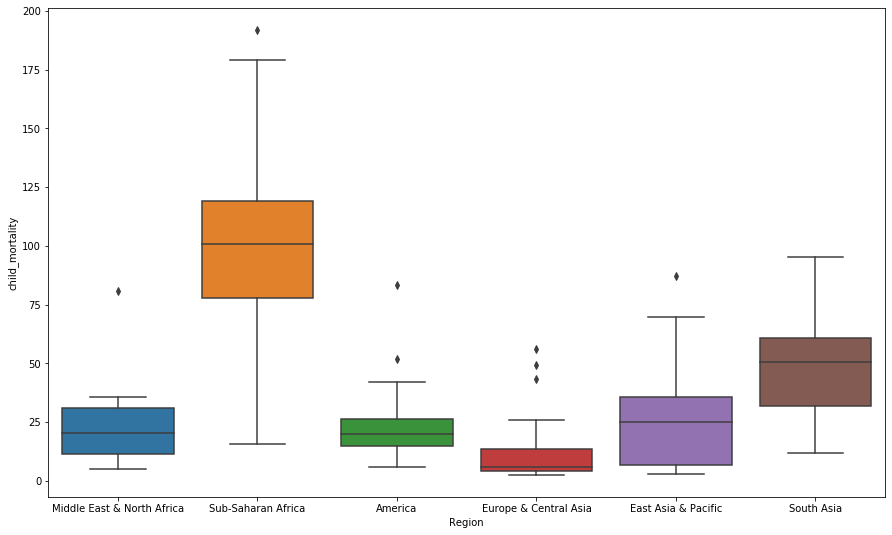

In [14]:
plt.figure(figsize=(15,9))
sns.boxplot(df1['Region'],df1['child_mortality'])

In [15]:
#do label encoding as per the median 
df1['Region'].replace({'Europe & Central Asia':0,
                      'America':1,
                      'Middle East & North Africa':2,
                      'East Asia & Pacific':3,
                      'South Asia':4,
                      'Sub-Saharan Africa':5},inplace=True)

In [16]:
df1.head()

fertility  HIV        CO2  BMI_male    GDP  BMI_female  life  \
0       2.73  0.1   3.328945  24.59620  12314    129.9049  75.3   
1       6.43  2.0   1.474353  22.25083   7103    130.1247  58.3   
2       2.24  0.5   4.785170  27.50170  14646    118.8915  75.5   
3       1.40  0.1   1.804106  25.35542   7383    132.8108  72.5   
4       1.96  0.1  18.016313  27.56373  41312    117.3755  81.5   

   child_mortality  Region  
0             29.5       2  
1            192.0       5  
2             15.4       1  
3             20.0       0  
4              5.2       3

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null int64
dtypes: float64(7), int64(2)
memory usage: 9.9 KB


In [18]:
# Target column in this problem will be child_mortality
X=df1.drop('child_mortality',axis=1)
y=df1['child_mortality']


In [19]:
X.head()

fertility  HIV        CO2  BMI_male    GDP  BMI_female  life  Region
0       2.73  0.1   3.328945  24.59620  12314    129.9049  75.3       2
1       6.43  2.0   1.474353  22.25083   7103    130.1247  58.3       5
2       2.24  0.5   4.785170  27.50170  14646    118.8915  75.5       1
3       1.40  0.1   1.804106  25.35542   7383    132.8108  72.5       0
4       1.96  0.1  18.016313  27.56373  41312    117.3755  81.5       3

In [20]:
for i in X:
    print('Skewness for',i,X[i].skew())

Skewness for fertility 0.9673942369047374
Skewness for HIV 3.9185261094083095
Skewness for CO2 3.6285963285060667
Skewness for BMI_male -0.2551056643902182
Skewness for GDP 2.3586616852353073
Skewness for BMI_female -0.08024995256794422
Skewness for life -0.5483816510869028
Skewness for Region 0.25632251942208867


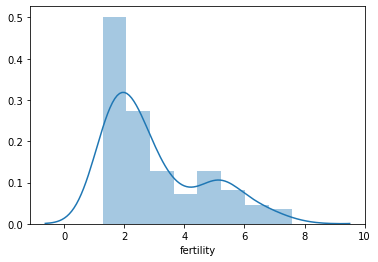

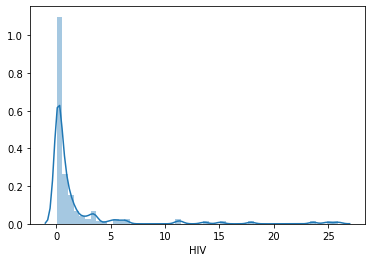

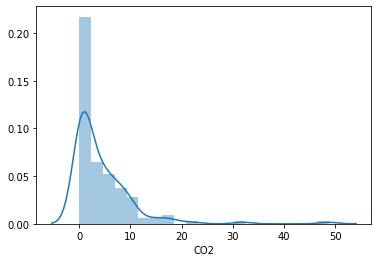

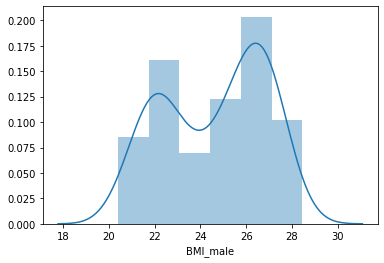

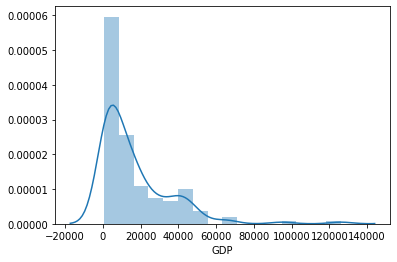

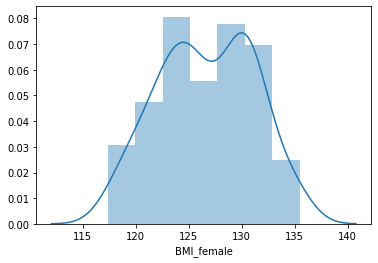

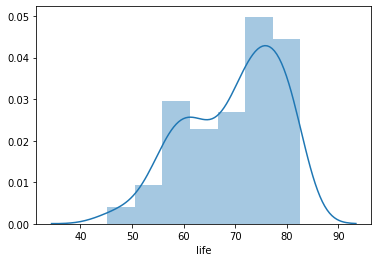

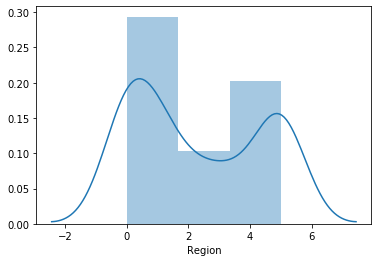

In [21]:
for i in X:
    sns.distplot(X[i])
    plt.show()

In [22]:
for i in X.iloc[:,0:-1]:
    if(X[i].skew()>=1):
        X[i]=np.log2(X[i])
    

In [23]:
for i in X.iloc[:,0:-1]:
    print('Skewness for',i,X[i].skew())

Skewness for fertility 0.9673942369047374
Skewness for HIV 0.5768704902985403
Skewness for CO2 -0.5878945228571555
Skewness for BMI_male -0.2551056643902182
Skewness for GDP -0.21095955114835732
Skewness for BMI_female -0.08024995256794422
Skewness for life -0.5483816510869028


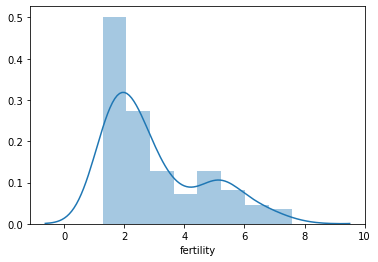

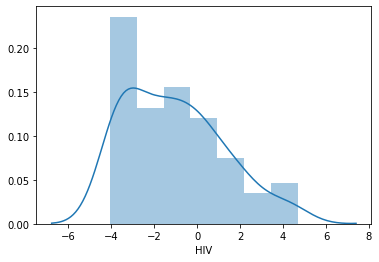

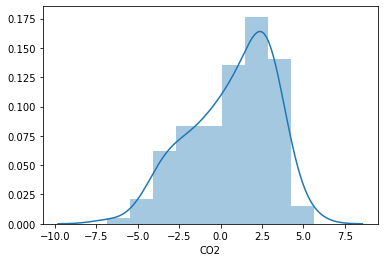

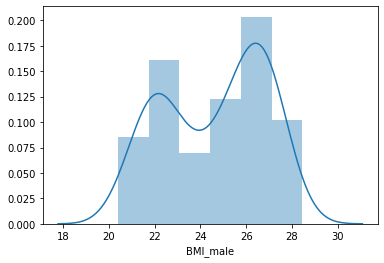

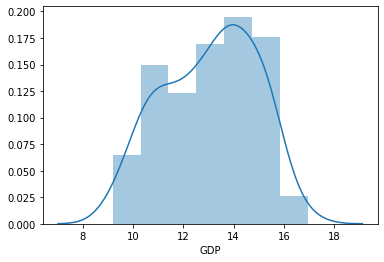

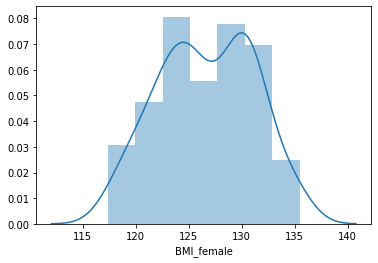

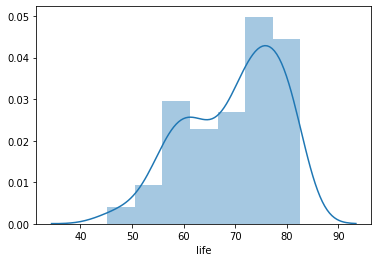

In [24]:
for i in X.iloc[:,0:-1]:
    sns.distplot(X[i])
    plt.show()

In [25]:
dd=pd.concat([X,y],axis=1)

In [26]:
dd

fertility       HIV       CO2  BMI_male        GDP  BMI_female  life  \
0         2.73 -3.321928  1.735065  24.59620  13.588012    129.9049  75.3   
1         6.43  1.000000  0.560082  22.25083  12.794213    130.1247  58.3   
2         2.24 -1.000000  2.258570  27.50170  13.838219    118.8915  75.5   
3         1.40 -3.321928  0.851284  25.35542  12.849991    132.8108  72.5   
4         1.96 -3.321928  4.171232  27.56373  15.334273    117.3755  81.5   
..         ...       ...       ...       ...        ...         ...   ...   
134       2.11 -1.000000  1.316009  26.39123  13.902846    124.2604  76.0   
135       2.46 -3.321928  2.162426  25.32054  11.866120    124.3462  68.7   
136       1.86 -1.321928  0.564960  20.91630  11.996120    121.9367  75.4   
137       5.88  3.765535 -2.746795  20.68321  11.569381    132.4493  52.0   
138       3.85  3.916477 -0.611925  22.02660  10.328675    131.9745  49.0   

     Region  child_mortality  
0         2             29.5  
1         5            192.0  
2         1             15.4  
3         0             20.0  
4         3              5.2  
..      ...              ...  
134       1             13.0  
135       0             49.2  
136       3             26.2  
137       5             94.9  
138       5             98.3  

[139 rows x 9 columns]

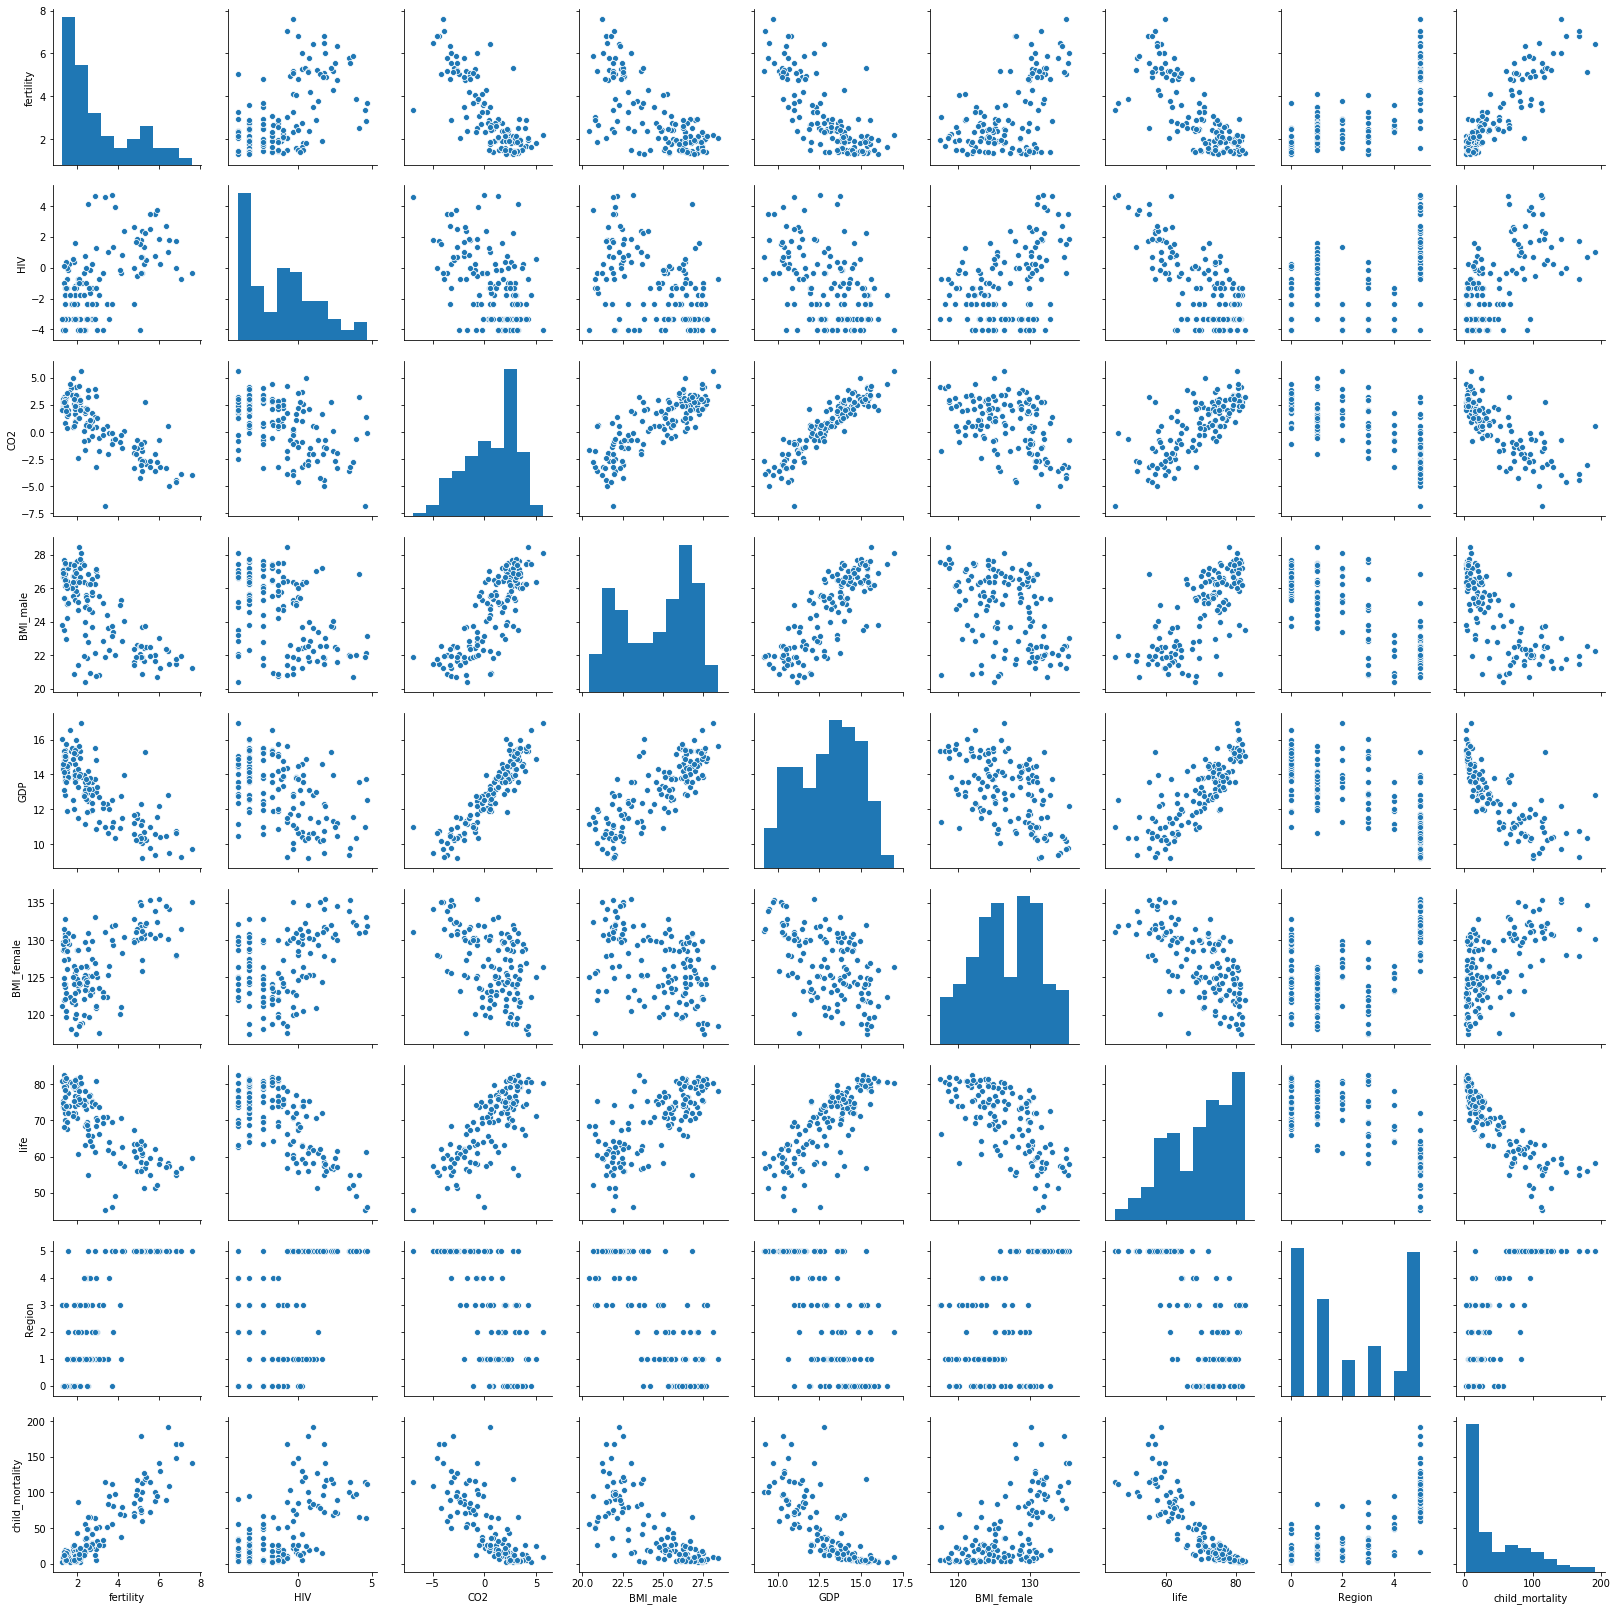

In [27]:
sns.pairplot(dd)

In [28]:
# Now fitting all the models without any selection 

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr.score(X_train,y_train)

0.8957036084236858

In [32]:
lr.score(X_test,y_test)

0.8552511756591751

In [33]:
# A condition of overfitting arises so we will do different regularisation techniques  

In [34]:
ri=RidgeCV(alphas=[9,10,11,10.5,10.8]) # So with different values of Ridge best comes to be 10.5 but no changes in result so we will do Lasso 
ri.fit(X_train,y_train)

RidgeCV(alphas=array([ 9. , 10. , 11. , 10.5, 10.8]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [35]:
ri.alpha_

10.5

In [36]:
ri.score(X_train,y_train)

0.894204540451947

In [37]:
ri.score(X_test,y_test)

0.8560023376362026

In [38]:
ls=LassoCV(alphas=[6,5,7,5.5,10])
ls.fit(X_train,y_train)

LassoCV(alphas=[6, 5, 7, 5.5, 10], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [39]:
ls.alpha_

5.0

In [40]:
ls.score(X_train,y_train)

0.880341015136646

In [41]:
ls.score(X_test,y_test)

0.8442549175338694

In [42]:
el=ElasticNetCV(alphas=[0.1,0.3,0.09,0.21,0.31]) #Regularisation did not change anything 
el.fit(X_train,y_train)

ElasticNetCV(alphas=[0.1, 0.3, 0.09, 0.21, 0.31], copy_X=True, cv=None,
             eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [43]:
el.alpha_

0.3

In [44]:
el.score(X_train,y_train)

0.8919734440892263

In [45]:
el.score(X_test,y_test)

0.8560839189821325

In [46]:
#Now for a distance based algo scaling is compalsary so we will do Standard scaller

In [47]:
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [48]:
knn=KNeighborsRegressor()
knn.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [49]:
knn.score(X_trains,y_train)

0.9027042461529114

In [50]:
knn.score(X_tests,y_test)

0.8063266489914533

In [51]:
# do Hyperperamteric tuning using gridsearchcv as our dataset is too small

In [52]:
params={'n_neighbors':np.arange(0,20),
   'p':np.arange(0,5),
   'weights':['distance','uniform']}
         

In [53]:
rr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='neg_mean_squared_error')
rr.fit(X_trains,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                         'p': array([0, 1, 2, 3, 4]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [54]:
knnp=KNeighborsRegressor(**rr.best_params_)
knnp.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                    weights='uniform')

In [55]:
knnp.score(X_trains,y_train)

0.9217141553458601

In [56]:
knnp.score(X_tests,y_test)

0.7828099755155281

In [57]:
# now as we are not able to acheive our results what we want to we will now 
#try different feature selection methods and apply the same algos

In [58]:
dff=pd.concat([X,y],axis=1)

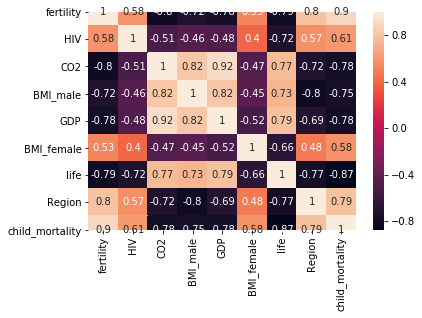

In [59]:
sns.heatmap(dff.corr(),annot=True)

In [60]:
dff.corr()

fertility       HIV       CO2  BMI_male       GDP  \
fertility         1.000000  0.582961 -0.798836 -0.715380 -0.777365   
HIV               0.582961  1.000000 -0.508603 -0.464747 -0.481495   
CO2              -0.798836 -0.508603  1.000000  0.820008  0.919619   
BMI_male         -0.715380 -0.464747  0.820008  1.000000  0.815811   
GDP              -0.777365 -0.481495  0.919619  0.815811  1.000000   
BMI_female        0.527314  0.396088 -0.473128 -0.447049 -0.515786   
life             -0.786921 -0.724148  0.765660  0.731559  0.793094   
Region            0.795410  0.566911 -0.721594 -0.802873 -0.693826   
child_mortality   0.901704  0.608344 -0.782187 -0.749691 -0.779921   

                 BMI_female      life    Region  child_mortality  
fertility          0.527314 -0.786921  0.795410         0.901704  
HIV                0.396088 -0.724148  0.566911         0.608344  
CO2               -0.473128  0.765660 -0.721594        -0.782187  
BMI_male          -0.447049  0.731559 -0.802873        -0.749691  
GDP               -0.515786  0.793094 -0.693826        -0.779921  
BMI_female         1.000000 -0.658718  0.479073         0.582053  
life              -0.658718  1.000000 -0.766512        -0.874106  
Region             0.479073 -0.766512  1.000000         0.793570  
child_mortality    0.582053 -0.874106  0.793570         1.000000

In [61]:
abs(dff.corr()['child_mortality'])[abs(dff.corr()['child_mortality'])>0.5]

fertility          0.901704
HIV                0.608344
CO2                0.782187
BMI_male           0.749691
GDP                0.779921
BMI_female         0.582053
life               0.874106
Region             0.793570
child_mortality    1.000000
Name: child_mortality, dtype: float64

In [62]:
dff[['fertility','HIV']].corr()

fertility       HIV
fertility   1.000000  0.582961
HIV         0.582961  1.000000

In [63]:
dff[['CO2','HIV']].corr()

CO2       HIV
CO2  1.000000 -0.508603
HIV -0.508603  1.000000

In [64]:
dff[['CO2','BMI_male']].corr()# drop BMI_MALE

CO2  BMI_male
CO2       1.000000  0.820008
BMI_male  0.820008  1.000000

In [65]:
dff[['CO2','GDP']].corr() # DROP GDP

CO2       GDP
CO2  1.000000  0.919619
GDP  0.919619  1.000000

In [66]:
dff[['CO2','BMI_female']].corr()

CO2  BMI_female
CO2         1.000000   -0.473128
BMI_female -0.473128    1.000000

In [67]:
dff[['life','BMI_female']].corr() # drop BMI FEMALE 

life  BMI_female
life        1.000000   -0.658718
BMI_female -0.658718    1.000000

In [68]:
dff['Region'].value_counts()

0    41
5    40
1    27
3    14
2    10
4     7
Name: Region, dtype: int64

In [69]:
from scipy.stats import f_oneway

In [70]:
f_oneway(dff[dff['Region']==0][['child_mortality']], 
        dff[dff['Region']==1][['child_mortality']],
        dff[dff['Region']==2][['child_mortality']],
        dff[dff['Region']==3][['child_mortality']],
        dff[dff['Region']==4][['child_mortality']],
        dff[dff['Region']==5][['child_mortality']])

F_onewayResult(statistic=array([67.64635464]), pvalue=array([7.52514539e-35]))

In [71]:
f_oneway(dff[dff['Region']==0][['life']],# high correlation between independent 
        dff[dff['Region']==1][['life']],
        dff[dff['Region']==2][['life']],
        dff[dff['Region']==3][['life']],
        dff[dff['Region']==4][['life']],
        dff[dff['Region']==5][['life']])

F_onewayResult(statistic=array([53.35831528]), pvalue=array([3.78640579e-30]))

In [72]:
X_new=dff.drop(['BMI_male','GDP','BMI_female','child_mortality'],axis=1)

In [73]:
Xn_train,Xn_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=0)

In [74]:
lr1=LinearRegression()
lr1.fit(Xn_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
lr1.score(Xn_train,y_train)

0.8909990842995947

In [76]:
lr1.score(Xn_test,y_test)

0.8610823247620647

In [77]:
ss=StandardScaler()
X_trainsn=ss.fit_transform(Xn_train)
X_testsn=ss.transform(Xn_test)



In [78]:
knn=KNeighborsRegressor()
knn.fit(X_trainsn,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [79]:
knn.score(X_trainsn,y_train)

0.9139286705303833

In [80]:
knn.score(X_testsn,y_test)

0.7711660020253248

In [81]:
# do Hyperperamteric tuning using gridsearchcv as our dataset is too small

params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

In [82]:
gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(X_trainsn,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [83]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(X_trainsn,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=6,
                    weights='distance')

In [84]:
knnn.score(X_trainsn,y_train)

1.0

In [85]:
knnn.score(X_testsn,y_test)

0.7704894461815032

In [86]:
# Using wrapper methods as well

In [87]:
#1. Backword selection 

In [88]:
cols=list(X.columns)
pmax=1
while(len(cols)>0):
    p=[]
    x_1=X[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    features_with_pmax=p.idxmax()
    if(pmax>0.05):
        cols.remove(features_with_pmax)
    else:
        break;
selected_features_be=cols
print(selected_features_be)

['fertility', 'life']


In [89]:
x_back=X[['fertility','life']]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_back,y,test_size=0.2,random_state=0)

In [91]:
lr_back=LinearRegression()
lr_back.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lr_back.score(x_train,y_train)

0.8883753087351335

In [93]:
lr_back.score(x_test,y_test)

0.8582247554476862

In [94]:
ss=StandardScaler()
X_trains_back=ss.fit_transform(x_train)
X_tests_back=ss.transform(x_test)

In [95]:
knn=KNeighborsRegressor()
knn.fit(X_trains_back,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [96]:
knn.score(X_trains_back,y_train)

0.9184773845975749

In [97]:
knn.score(X_tests_back,y_test)

0.8480548181721861

In [98]:
params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

In [99]:
gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(X_trains_back,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [100]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(X_trains_back,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=6,
                    weights='uniform')

In [101]:
knnn.score(X_trains_back,y_train)

0.9072224669136759

In [102]:
knnn.score(X_tests_back,y_test)

0.8345811918049676

In [103]:
#RFE
from sklearn.feature_selection import RFE

In [104]:
nof_list=np.arange(1,8)
high_score=0
nof=0
score_list=[]
for n in range(len(nof_list)):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    model=LinearRegression()
    rfe=RFE(model,nof_list[n])
    x_train_rfe=rfe.fit_transform(x_train,y_train)
    x_test_rfe=rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score=model.score(x_test_rfe,y_test)
    score_list.append(score)
    if score>high_score:
        high_score=score
        nof=nof_list[n]
print('optimum number of features: %d' %nof)
print('score with %d features: %f' %(nof,high_score))

optimum number of features: 5
score with 5 features: 0.858076


In [105]:
cols=list(X.columns)
model=LinearRegression()
rfe=RFE(model,5)
x_rfe=rfe.fit_transform(X,y)
model.fit(x_rfe,y)
temp=pd.Series(rfe.support_,index=cols)
selected_features_rfe=temp[temp==True].index
print(selected_features_rfe)

Index(['fertility', 'HIV', 'BMI_male', 'GDP', 'life'], dtype='object')


In [106]:
Xnew=X[['fertility', 'HIV', 'BMI_male', 'GDP', 'life']]

In [107]:
x_train,x_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.2,random_state=0)

In [108]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lr.score(x_train,y_train)

0.8951331852274612

In [110]:
lr.score(x_test,y_test)

0.8580760851321856

In [111]:
ss=StandardScaler()
X_trains=ss.fit_transform(x_train)
X_tests=ss.transform(x_test)

In [112]:
knn=KNeighborsRegressor()
knn.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [113]:
knn.score(X_trains,y_train)

0.9250612430651668

In [114]:
knn.score(X_tests,y_test)

0.8430388174454987

In [115]:
params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(X_trains,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [116]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')

In [117]:
knnn.score(X_trains,y_train)


1.0

In [118]:
knnn.score(X_tests,y_test)

0.8234790025225764

In [193]:
# Applying PCA

In [124]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [125]:
df_scaled = X.apply(zscore)

In [126]:
pca=PCA()
Xpca = pca.fit_transform(df_scaled)

In [129]:
pca.explained_variance_ratio_

array([0.71303901, 0.09327323, 0.0774361 , 0.04438237, 0.03278054,
       0.0167959 , 0.01363233, 0.00866051])

In [132]:
pca=PCA(n_components=5)
Xpca = pca.fit_transform(df_scaled)

In [134]:
Xpca=pd.DataFrame(Xpca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])

In [135]:
Xpca

PCA1      PCA2      PCA3      PCA4      PCA5
0   -0.716346 -0.062147  1.160814  0.498417 -0.001772
1    2.697583  0.581626 -0.345311  1.151179 -0.733981
2   -2.008291 -0.271894 -1.263623 -0.426677 -0.530352
3   -0.925564  0.401515  1.884666 -0.700970  0.502041
4   -2.969385 -0.779786 -1.114032  1.172817 -0.609857
..        ...       ...       ...       ...       ...
134 -1.417480  0.110413 -0.358487 -0.372119 -0.121518
135 -1.025107 -0.591420  0.503357 -0.813315 -0.061454
136  0.139684 -1.600262 -0.574941  0.251969  1.384144
137  4.347217  0.865438 -0.588889  0.151932  0.162444
138  3.698960  1.275883 -0.601885 -0.181018  0.913628

[139 rows x 5 columns]

In [136]:
x_train,x_test,y_train,y_test=train_test_split(Xpca,y,test_size=0.2,random_state=0)

In [137]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
lr.score(x_train,y_train)

0.8611949359419027

In [139]:
lr.score(x_test,y_test)

0.8336675668027639

In [189]:
ri=RidgeCV(alphas=[10,9,1,5,4,7,8,3]) # So with different values of Ridge best comes to be 10.5 but no changes in result so we will do Lasso 
ri.fit(x_train,y_train)


RidgeCV(alphas=array([10,  9,  1,  5,  4,  7,  8,  3]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [190]:
ri.alpha_

3

In [191]:
ri.score(x_train,y_train)

0.860823115494803

In [192]:
ri.score(x_test,y_test)

0.8336561289613531

In [140]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [141]:
knn.score(x_train,y_train)

0.8924552854405585

In [142]:
knn.score(x_test,y_test)

0.7974491019955456

In [143]:
params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

In [145]:
gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [146]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(x_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=6,
                    weights='uniform')

In [147]:
knnn.score(x_train,y_train)

0.839267710252678

In [148]:
knnn.score(x_test,y_test)

0.810723894241064

In [194]:
# Till here filter method LR appears to be the best 